In [1]:
# not strictly necessary, but imported anyway for the IDE haha
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

No of images in training set: 835
No of images in validation set: 104
No of images in test set: 105
No of images in feeder set: 15079
Labels: ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
Labels (feeder): ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
:
::
:::
-
hel


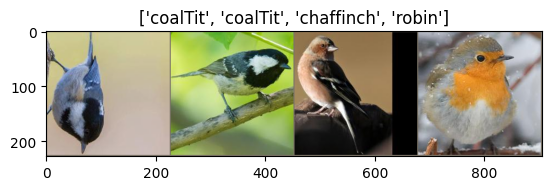

In [2]:
%run setup.ipynb # should take like 20 seconds i think

# Training with augmentation

Now we've trained our model and assessed its performance on the feeder data... it's not the worst, but let's see if we can't make it a bit stronger by adding augmentations.

## Augmentation round 1

First, just gonna mess up the pictures a little - no sciency arguments for it other than intuitively trying to capture that the feeder images are more grainy and the birds are not always perfectly posed (hence the crop).

In [ ]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation1 = transforms.Compose([
    transforms.ColorJitter(brightness=0.1),
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)),
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug1 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation1)
#normal_and_aug1 = torch.utils.data.ConcatDataset([dataset_train, dataset_train_aug1]) # FIXME
dataloader_train_aug1 = torch.utils.data.DataLoader(dataset_train_aug1, batch_size=8, shuffle=True, num_workers=4)
#dataset_val_aug1 = datasets.ImageFolder(PATH_VAL, preprocess_with_augmentation1)
#dataloader_val_aug1 = torch.utils.data.DataLoader(dataset_val_aug1, batch_size=4, shuffle=True, num_workers=4)

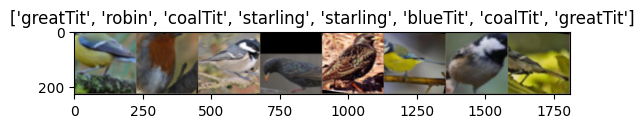

In [17]:
# looking at the augmentations..
inputs, classes = next(iter(dataloader_train_aug1))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_labels[x] for x in classes])

Load in a fresh ResNet50 that's prepped for transfer learning

In [18]:
# load "clean" resnet50
untrained_model_aug1 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug1) # FIXME does this change?

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Training
First with the frozen layers, then unfreeze for finetuning

In [19]:
freezetrained_model_aug1, _ = train_model(model=untrained_model_aug1, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug1)

Epoch 1/24
----------
Train Loss: 1.8472 Acc: 0.3293
Val Loss: 1.7878 Acc: 0.4135
Epoch time 1m 13s
----------

Epoch 2/24
----------
Train Loss: 1.5973 Acc: 0.5940
Val Loss: 1.6843 Acc: 0.4712
Epoch time 2m 28s
----------

Epoch 3/24
----------
Train Loss: 1.4083 Acc: 0.6551
Val Loss: 1.5904 Acc: 0.5192
Epoch time 3m 37s
----------

Epoch 4/24
----------
Train Loss: 1.2946 Acc: 0.7090
Val Loss: 1.4997 Acc: 0.5673
Epoch time 4m 47s
----------

Epoch 5/24
----------
Train Loss: 1.1794 Acc: 0.7509
Val Loss: 1.4150 Acc: 0.5673
Epoch time 5m 58s
----------

Epoch 6/24
----------
Train Loss: 1.0980 Acc: 0.7257
Val Loss: 1.3845 Acc: 0.6250
Epoch time 7m 10s
----------

Epoch 7/24
----------
Train Loss: 1.0255 Acc: 0.7473
Val Loss: 1.3413 Acc: 0.5769
Epoch time 8m 21s
----------

Epoch 8/24
----------
Train Loss: 0.9823 Acc: 0.7641
Val Loss: 1.3015 Acc: 0.5769
Epoch time 9m 32s
----------

Epoch 9/24
----------
Train Loss: 0.9380 Acc: 0.7701
Val Loss: 1.2583 Acc: 0.6154
Epoch time 10m 45s
---

In [20]:
unfreeze_layers(freezetrained_model_aug1)
model_aug1, model_aug1_info = train_model(model=freezetrained_model_aug1, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug1)

Epoch 1/24
----------
Train Loss: 0.5635 Acc: 0.8323
Val Loss: 0.5372 Acc: 0.8750
Epoch time 1m 55s
----------

Epoch 2/24
----------
Train Loss: 0.4029 Acc: 0.8683
Val Loss: 0.5839 Acc: 0.8077
Epoch time 3m 49s
----------

Epoch 3/24
----------
Train Loss: 0.2920 Acc: 0.9114
Val Loss: 0.2866 Acc: 0.9519
Epoch time 5m 41s
----------

Epoch 4/24
----------
Train Loss: 0.2562 Acc: 0.9114
Val Loss: 0.3193 Acc: 0.9231
Epoch time 7m 32s
----------

Epoch 5/24
----------
Train Loss: 0.2400 Acc: 0.9138
Val Loss: 0.3188 Acc: 0.9231
Epoch time 9m 26s
----------

Epoch 6/24
----------
Train Loss: 0.1881 Acc: 0.9365
Val Loss: 0.3659 Acc: 0.9038
Epoch time 11m 18s
----------

Epoch 7/24
----------
Train Loss: 0.1819 Acc: 0.9329
Val Loss: 0.2483 Acc: 0.9327
Epoch time 13m 8s
----------

Epoch 8/24
----------
Train Loss: 0.1641 Acc: 0.9461
Val Loss: 0.1907 Acc: 0.9615
Epoch time 14m 60s
----------

Epoch 9/24
----------
Train Loss: 0.1695 Acc: 0.9425
Val Loss: 0.1739 Acc: 0.9519
Epoch time 16m 51s
-

### Round 1 results

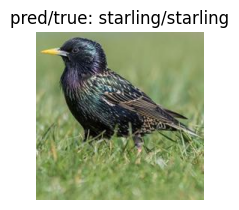

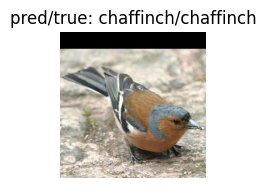

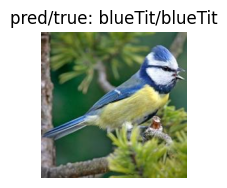

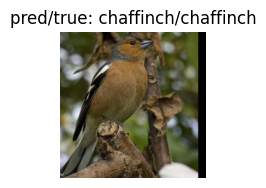

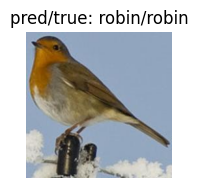

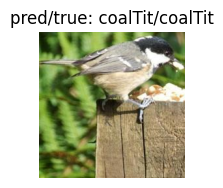

In [21]:
visualize_model(model_aug1, dataloader_tiny_val, class_labels, device)

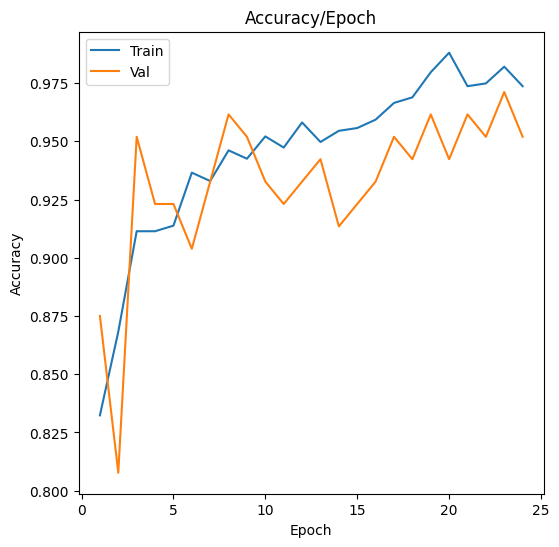

In [22]:
plot_accuracies(model_aug1_info["train_acc"], model_aug1_info["val_acc"], ["Train", "Val"])

[[14  0  1  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 14  0  1  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  3  0 12  0  0]
 [ 0  1  0  0  0 14  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 94.28571428571428


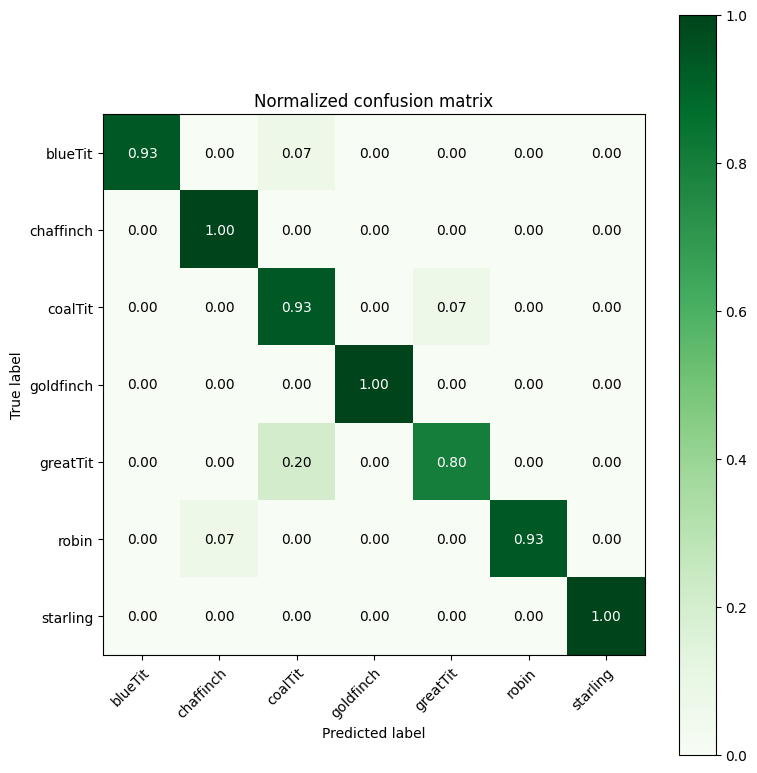

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


# Change model setup 

Change learning rate and add weight decay 

In [3]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation1 = transforms.Compose([
    transforms.ColorJitter(brightness=0.1),
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)),
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug1 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation1)
dataloader_train_aug1 = torch.utils.data.DataLoader(dataset_train_aug1, batch_size=8, shuffle=True, num_workers=4)

In [ ]:
# Set and load model
untrained_model_aug1 = load_and_prep_resnet50()
optimizer = torch.optim.SGD(untrained_model_aug1.parameters(), lr=0.02, momentum=0.9, weight_decay=0.00001)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

NameError: name 'model' is not defined

In [ ]:
freezetrained_model_aug1, _ = train_model(model=untrained_model_aug1, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug1) 

In [ ]:
unfreeze_layers(freezetrained_model_aug1)
model_aug1, model_aug1_info = train_model(model=freezetrained_model_aug1, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug1)

## Results

In [ ]:
visualize_model(model_aug1, dataloader_tiny_val, class_labels, device)

In [ ]:
plot_accuracies(model_aug1_info["train_acc"], model_aug1_info["val_acc"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [ ]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, class_labels))